In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Функция для создания выборки размера size из равномерного распределения с параметрами a,b
def generate_data_uniform(a:int, b:int, size:int):
    return np.random.uniform(a,b, size)

In [3]:
#Функция для матожидания случайной величины из равномерного распределения с параметрами a,b
def variance(a:int, b:int):
    return (b-a)**2/12.0

In [4]:
#Функция, вычисляющая значение выборочной дисперсии смещенной
def sn_bias(data:list):
    mean = sum(data)/len(data)
    square_deviation = lambda x : (x - mean) ** 2 
    return sum( map(square_deviation, data) ) / len(data)

In [5]:
#Функция, вычисляющая значение выборочной дисперсии несмещенной
def sn_fixed(data:list):
    mean = sum(data)/len(data)
    square_deviation = lambda x : (x - mean) ** 2 
    return sum( map(square_deviation, data) ) / (len(data)-1)

In [8]:
def experiment1(n:int, exper_count:int, eps = float):
    a = 0.0
    b = 10.0
    true_var = variance(a, b)
    
    s_biased = []
    s_fixed = []
    for i in range(exper_count):
        #Генерация выборки
        X =  generate_data_uniform(a, b, n)
        s_biased.append(sn_bias(X))
        s_fixed.append(sn_fixed(X))
    mean_s_biased = np.mean(np.array(s_biased))
    mean_s_fixed = np.mean(np.array(s_fixed))
    res= "E(s_biased) при n= "+str(n)+" и повторе экспериментов "+\
    str(exper_count)+ " раз = "+str(mean_s_biased) +" , а дисперсия = "+ str(true_var)
    print(res)
    if abs(np.mean(np.array(s_biased))-true_var)>eps:
        print("Следовательно, оценка смещена")
          
          
    res= "E(s_biased) при n= "+str(n)+" и повторе экспериментов "+\
    str(exper_count)+ " раз = "+str(mean_s_fixed) +" , а дисперсия = "+ str(true_var)
    print(res)
    if abs(np.mean(np.array(mean_s_fixed))-true_var)<eps:
        print("Следовательно, оценка не смещена")
    

In [9]:
def experiment2(start_n:int, end_n:int, size:int, exper_count:int):
    a = 0.0
    b = 10.0
    true_var = variance(a, b)
    
    s_biased_mean = []
    s_fixed_mean= []
    #Создание массива различных n(размер выборки) с переданными в функцию параметрами
    N = np.linspace(start_n, end_n, num=size, dtype = int)
    for n in N:
        s_biased = []
        s_fixed = []
        for i in range(exper_count):
            #Генерация выборки
            X =  generate_data_uniform(a, b, n)
            s_biased.append(sn_bias(X))
            s_fixed.append(sn_fixed(X))
        s_biased_mean.append(np.mean(np.array(s_biased)))
        s_fixed_mean.append(np.mean(np.array(s_fixed)))
        
    return s_biased_mean, s_fixed_mean, true_var

In [16]:
#Создание графика по вычисленным выше значениям
def bias_of_estimation_behavior():
    start_n =5
    end_n=1000
    size= int((end_n-start_n)/10)
    s_biased, s_fixed, true_var = experiment2(start_n, end_n, size, 100)
    n = np.linspace(start_n, end_n, num=size, dtype = int)
    
    fig, ax = plt.subplots() #fig, ax = plt.subplots(1,2) 
    ax.plot(n, s_biased)
    ax.axhline(y=true_var, color='r', linestyle='-')
#     ax[1].plot(n, s_fixed)
#     ax[1].axhline(y=true_var, color='r', linestyle='-')

#     ax.set(xlabel='n', ylabel='sup(|F(x)-Fn(x)|)',
#        title='Graph of n and supremums')
#     ax.grid()
    plt.show()

In [17]:
experiment1(20, 1000, 0.2)

E(s_biased) при n= 20 и повторе экспериментов 1000 раз = 7.953978749773851 , а дисперсия = 8.333333333333334
Следовательно, оценка смещена
E(s_biased) при n= 20 и повторе экспериментов 1000 раз = 8.372609210288266 , а дисперсия = 8.333333333333334
Следовательно, оценка не смещена


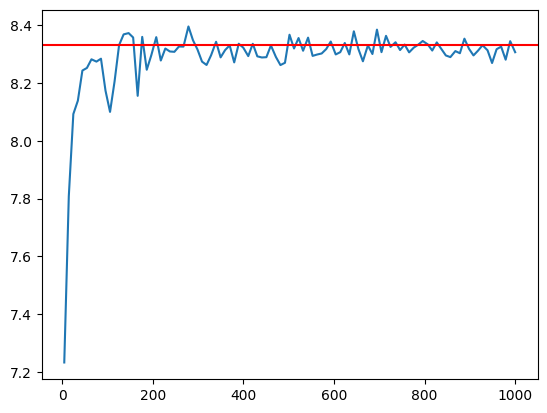

In [18]:
bias_of_estimation_behavior()